# Sparse Hebbian Learning : testing two different learning rates strategies

1- Dictionary initialized as 2D White Noise

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)
from copy import deepcopy

In [3]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'rec_error', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 7
homeo_params = dict(eta_homeo=0.05, alpha_homeo=0.02)
homeo_params = dict(eta_homeo=0.05, C=5, nb_quant=256, P_cum=None)
tag = 'learning-rates'
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, n_iter=2**10, record_each=16, 
            homeo_method='HEH', homeo_params=homeo_params,
            learning_algorithm='mp', verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')

Extracting data..loading the data called : /tmp/data_cache/data_data
Data is of shape : (81920, 256) - done in 0.14s.


## fixed learning rate

No cache found /tmp/data_cache/learning-rates_fixed_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Learning code... Iteration   0 /   1024 (elapsed time:   3s,  0.0mn)
Iteration  16 /   1024 (elapsed time:  61s,  1.0mn)
Iteration  32 /   1024 (elapsed time:  119s,  1.0mn)
Iteration  48 /   1024 (elapsed time:  175s,  2.0mn)
Iteration  64 /   1024 (elapsed time:  233s,  3.0mn)
Iteration  80 /   1024 (elapsed time:  289s,  4.0mn)
Iteration  96 /   1024 (elapsed time:  344s,  5.0mn)
Iteration  112 /   1024 (elapsed time:  397s,  6.0mn)
Iteration  128 /   1024 (elapsed time:  452s,  7.0mn)
Iteration  144 /   1024 (elapsed time:  507s,  8.0mn)
Iteration  160 /   1024 (elapsed time:  564s,  9.0mn)
Iteration  176 /   1024 (elapsed time:  620s,  10.0mn)
Iteration  192 /   1024 (elapsed time:  676s,  11.0mn)
Iteration  208 /   1024 (elapsed time:  732s,  12.0mn)
Iteration  224 /   1024 (elapsed time:  788s,  13.0mn)
Iteration  240 /   1024 (elapsed time:  844s, 

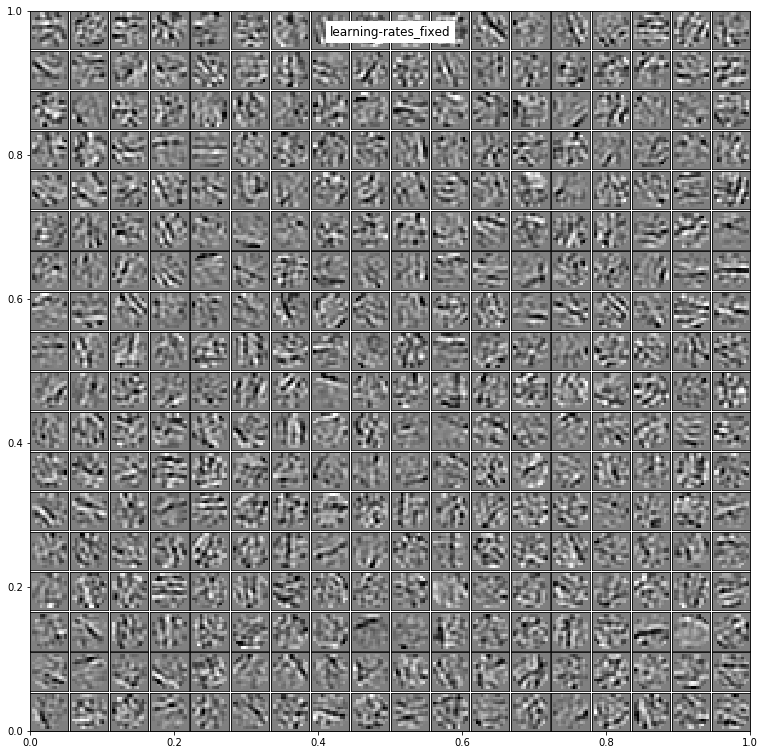

In [4]:
matname = tag + '_fixed'
shl = SHL(eta=0.01, **deepcopy(opts))
dico_fixed = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

## ADAM

See https://arxiv.org/pdf/1412.6980.pdf

No cache found /tmp/data_cache/learning-rates_ADAM_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Learning code... Iteration   0 /   1024 (elapsed time:   3s,  0.0mn)
Iteration  16 /   1024 (elapsed time:  52s,  0.0mn)
Iteration  32 /   1024 (elapsed time:  101s,  1.0mn)
Iteration  48 /   1024 (elapsed time:  151s,  2.0mn)
Iteration  64 /   1024 (elapsed time:  200s,  3.0mn)
Iteration  80 /   1024 (elapsed time:  249s,  4.0mn)
Iteration  96 /   1024 (elapsed time:  298s,  4.0mn)
Iteration  112 /   1024 (elapsed time:  348s,  5.0mn)
Iteration  128 /   1024 (elapsed time:  395s,  6.0mn)
Iteration  144 /   1024 (elapsed time:  444s,  7.0mn)
Iteration  160 /   1024 (elapsed time:  492s,  8.0mn)
Iteration  176 /   1024 (elapsed time:  541s,  9.0mn)
Iteration  192 /   1024 (elapsed time:  591s,  9.0mn)
Iteration  208 /   1024 (elapsed time:  637s,  10.0mn)
Iteration  224 /   1024 (elapsed time:  685s,  11.0mn)
Iteration  240 /   1024 (elapsed time:  732s,  12

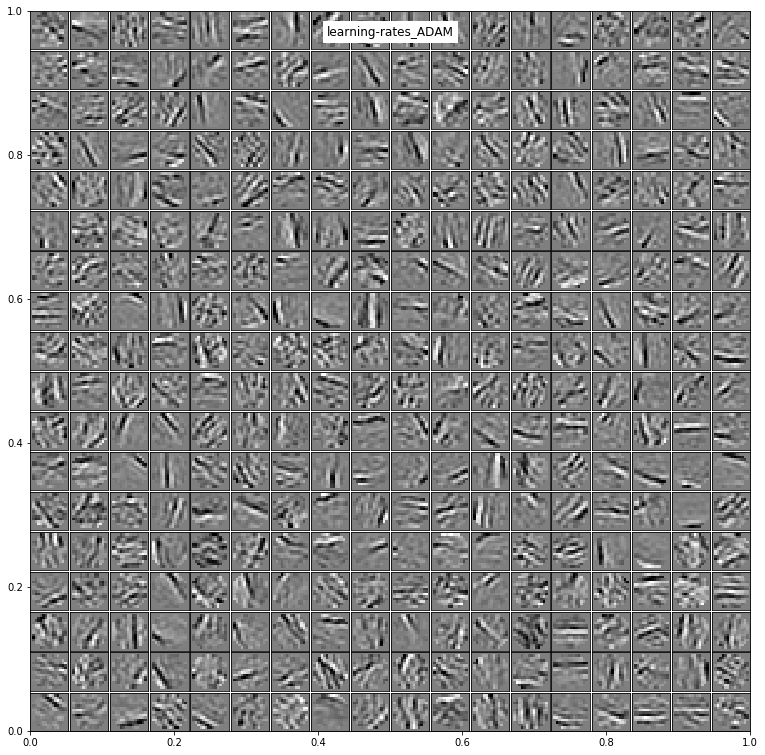

In [5]:
matname = tag + '_ADAM'
shl = SHL(eta=dict(eta=.002, beta1=.9, beta2=.999, epsilon=1.e-8), **deepcopy(opts))
dico_adam = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

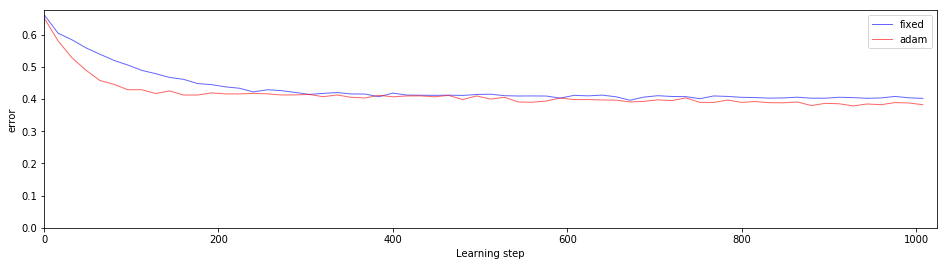

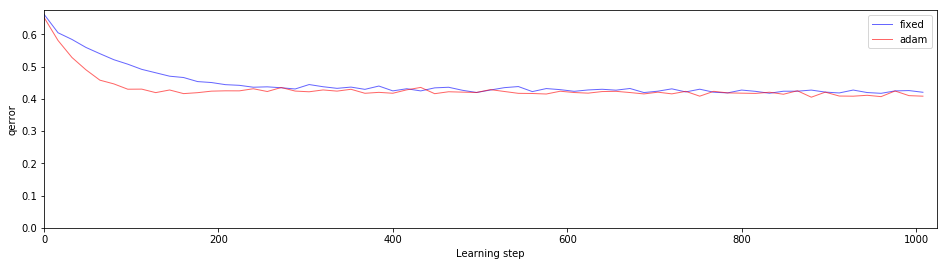

In [6]:
for variable in ['error', 'qerror']:
    fig_error, ax_error = None, None
    fig_error, ax_error = shl.time_plot(dico_fixed, variable=variable, fig=fig_error, ax=ax_error, color='blue', label='fixed')
    fig_error, ax_error = shl.time_plot(dico_adam, variable=variable, fig=fig_error, ax=ax_error, color='red', label='adam')
    #ax_error.set_ylim((0, .65))
    ax_error.legend(loc='best')
    plt.show();